<a href="https://colab.research.google.com/github/leonardoub/SCRIPT_PALERMO/blob/master/exploring/BIS_explore_database_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisi fatta selezionando solo i pazienti con Overall_Stage uguale a I o II, in maniera tale da uniformare tale features sia sul database pubblico che su quello di Palermo. Infatti nel database pubblico sono presenti Overall_Stage = I, II, IIIa e IIIB; mentre nel datbase di Palermo sono prensenti sono Overall_Stage = I e II.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

#Load data

In [2]:
#load data from Drive
from google.colab import drive
drive.mount('/gdrive')
#%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
train_dataset_path = '/gdrive/My Drive/AIM_PA/database_training2.csv'
test_dataset_path = '/gdrive/My Drive/AIM_PA/database_nostro_without_nan.csv'

Dal database di Palermo sono stati tolti 13 casi per i quali non si aveva Hisology. I pazienti tolti hanno tutti Overall_Stage = I.

In [0]:
df_train = pd.read_csv(train_dataset_path)
df_test = pd.read_csv(test_dataset_path)

In [0]:
df_train.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_test.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_train.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)
df_test.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)

In [0]:
df_train.rename(columns={'deadstatus.event':'Deadstatus_event'}, inplace=True)
df_test.rename(columns={'deadstatus.event':'Deadstatus_event'}, inplace=True)

In [0]:
#train_data = df_train.drop(['Histology', 'Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
#test_data = df_test.drop(['Histology', 'Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
#train_labels = df_train.Histology

In [0]:
#test_labels = df_test.Histology

Nel database di Palermo ci sono solo 5 soggetti che hanno Overall_Stage = II. Sia considerando la versione in cui sono stati tolti i pazienti per i quali non si ha Histology che quella originale.

In [13]:
df_train.Overall_Stage.unique()

array(['I', 'IIIa', 'IIIb', 'II', nan], dtype=object)

In [14]:
df_test.Overall_Stage.unique()

array(['I', 'II'], dtype=object)

In [15]:
list(df_train.Overall_Stage).count('I')

27

In [16]:
list(df_train.Overall_Stage).count('II')

13

In [17]:
list(df_test.Overall_Stage).count('I')

29

In [18]:
list(df_test.Overall_Stage).count('II')

5

In [0]:
#considerare i casi del database di Palermo che hanno Overall_Stage = I o II
df_train_selected = df_train.loc[(df_train['Overall_Stage']=='I') | (df_train['Overall_Stage']=='II')]

In [20]:
df_train_selected

,Histology,Surv_time_months,OS,Deadstatus_event,VoxelVolume,Maximum3DDiameter,MeshVolume,MajorAxisLength,Sphericity,LeastAxisLength,Elongation,SurfaceVolumeRatio,Maximum2DDiameterSlice,Flatness,SurfaceArea,MinorAxisLength,Maximum2DDiameterColumn,Maximum2DDiameterRow,GrayLevelVariance,HighGrayLevelEmphasis,DependenceEntropy,DependenceNonUniformity,GrayLevelNonUniformity,SmallDependenceEmphasis,SmallDependenceHighGrayLevelEmphasis,DependenceNonUniformityNormalized,LargeDependenceEmphasis,LargeDependenceLowGrayLevelEmphasis,DependenceVariance,LargeDependenceHighGrayLevelEmphasis,SmallDependenceLowGrayLevelEmphasis,LowGrayLevelEmphasis,JointAverage,SumAverage,JointEntropy,ClusterShade,MaximumProbability,Idmn,JointEnergy,Contrast,...,Kurtosis,Mean,ShortRunLowGrayLevelEmphasis,GrayLevelVariance.1,LowGrayLevelRunEmphasis,GrayLevelNonUniformityNormalized,RunVariance,GrayLevelNonUniformity.1,LongRunEmphasis,ShortRunHighGrayLevelEmphasis,RunLengthNonUniformity,ShortRunEmphasis,LongRunHighGrayLevelEmphasis,RunPercentage,LongRunLowGrayLevelEmphasis,RunEntropy,HighGrayLevelRunEmphasis,RunLengthNonUniformityNormalized,GrayLevelVariance.2,ZoneVariance,GrayLevelNonUniformityNormalized.1,SizeZoneNonUniformityNormalized,SizeZoneNonUniformity,GrayLevelNonUniformity.2,LargeAreaEmphasis,SmallAreaHighGrayLevelEmphasis,ZonePercentage,LargeAreaLowGrayLevelEmphasis,LargeAreaHighGrayLevelEmphasis,HighGrayLevelZoneEmphasis,SmallAreaEmphasis,LowGrayLevelZoneEmphasis,ZoneEntropy,SmallAreaLowGrayLevelEmphasis,Coarseness,Complexity,Strength,Contrast.1,Busyness,Overall_Stage
0,adenocarcinoma,5,1_anno,1,51905.377962,66.288317,51847.748274,50.574214,0.649258,37.884620,0.821088,0.199752,63.135672,0.749090,10356.675894,41.525899,65.067279,55.325619,12.481889,1084.854684,5.949646,918.046673,5312.127441,0.122582,97.652454,0.050648,141.807349,0.124010,42.380287,163828.301666,0.000266,0.001208,33.190463,66.380925,4.331076,-475.448161,0.308299,0.994676,0.133643,8.029403,...,17.777521,5.650502,0.001166,17.478141,0.001372,0.192540,1.399893,2288.112500,3.749302,793.234742,6675.859117,0.776723,4220.221337,0.654950,0.003806,4.209293,1049.544424,0.560736,34.869500,42116.076135,0.060025,0.517739,1145.238698,132.775769,42183.224231,540.316964,0.122035,36.510775,4.877236e+07,751.520796,0.747563,0.002453,5.741322,0.001663,0.000357,928.016789,1.153806,0.020920,1.306338,I
1,adenocarcinoma,18,2_anni,1,13432.502747,58.057539,13312.697411,48.354803,0.572236,18.135097,0.546338,0.356577,40.146103,0.375042,4747.006589,26.418066,32.760898,56.652510,60.615944,1076.589137,7.130906,595.667519,351.846858,0.307871,239.202712,0.126873,32.011715,0.031426,12.612334,41890.348882,0.001812,0.003214,33.522040,67.044080,7.487967,-2829.110940,0.055759,0.985695,0.015596,38.337756,...,5.224099,-91.310969,0.003404,65.432452,0.003524,0.064158,0.230922,262.139314,1.567042,926.829706,3237.676584,0.908183,1777.017297,0.869059,0.004164,5.072184,1044.275778,0.790377,84.615342,598.216508,0.033349,0.543736,843.878866,51.757732,607.367912,543.633876,0.330564,0.465530,8.137725e+05,763.567010,0.764879,0.006307,6.451087,0.004959,0.001680,2944.805484,2.266070,0.146173,0.253533,I
2,adenocarcinoma,31,3_anni,0,25843.872675,52.918217,25724.437234,39.406474,0.675497,28.487740,0.891907,0.242519,46.415213,0.722920,6238.658603,35.146929,47.180420,46.322906,55.064124,1131.900166,6.932158,844.783490,1023.136953,0.253452,192.059998,0.093605,57.855402,0.045979,22.286238,79266.271357,0.000812,0.001864,34.046184,68.092368,6.796695,-3133.512010,0.106695,0.984515,0.033042,32.375097,...,5.387644,-67.724986,0.001973,61.733697,0.002096,0.085594,0.426431,626.125860,1.968083,906.575851,5266.417163,0.870954,2393.005796,0.809077,0.002930,4.968901,1079.567623,0.718481,68.928494,3157.415098,0.036760,0.531612,1319.991542,91.276279,3170.626259,525.709823,0.275125,2.306913,4.377395e+06,732.877970,0.757392,0.003456,6.294554,0.002520,0.000745,2146.780339,1.238883,0.152919,0.611772,I
3,adenocarcinoma,38,4_anni,1,22152.709032,46.635312,22099.0167

#Confronto di medie e stdev per tutte le features tra dataset di train e datset di test 

In [0]:
train_data_bis = df_train.drop(['Histology', 'OS', 'Deadstatus_event','Overall_Stage'], axis=1)

In [0]:
train_data_bis_selected = df_train_selected.drop(['Histology', 'OS', 'Deadstatus_event', 'Overall_Stage'], axis=1)

In [0]:
test_data_bis = df_test.drop(['Histology', 'OS', 'Deadstatus_event', 'Overall_Stage'], axis=1)

In [0]:
mean_train_data = train_data_bis.mean()

In [0]:
std_train_data = train_data_bis.std()

In [0]:
mean_train_data_selected = train_data_bis_selected.mean()

In [0]:
std_train_data_selected = train_data_bis_selected.std()

In [0]:
mean_test_data = test_data_bis.mean()

In [0]:
std_test_data = test_data_bis.std()

In [0]:
my_dict = {'mean_train_data': mean_train_data , 'std_train_data': std_train_data,
           'mean_train_data_selected': mean_train_data_selected , 'std_train_data_selected': std_train_data_selected, 
           'mean_test_data': mean_test_data, 'std_test_data': std_test_data}

In [0]:
result = pd.DataFrame.from_dict(my_dict)

In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [33]:
result

,mean_train_data,std_train_data,mean_train_data_selected,std_train_data_selected,mean_test_data,std_test_data
Surv_time_months,2.116794e+01,1.672637e+01,2.262500e+01,1.697160e+01,1.894118e+01,9.966432e+00
VoxelVolume,7.931645e+04,8.382620e+04,7.147836e+04,8.520170e+04,1.641285e+04,1.988371e+04
Maximum3DDiameter,7.641797e+01,3.120654e+01,6.871389e+01,3.299414e+01,4.295581e+01,1.787877e+01
MeshVolume,7.916172e+04,8.379579e+04,7.134946e+04,8.516084e+04,1.633850e+04,1.985763e+04
MajorAxisLength,6.182093e+01,2.670927e+01,5.473587e+01,2.692724e+01,3.549409e+01,1.494185e+01
Sphericity,5.931281e-01,9.993818e-02,6.408436e-01,1.039703e-01,7.049689e-01,8.447242e-02
LeastAxisLength,3.407870e+01,1.442964e+01,3.183695e+01,1.459978e+01,1.986617e+01,8.304821e+00
Elongation,7.456275e-01,1.507488e-01,7.785900e-01,1.382626e-01,7.389066e-01,1.365775e-01
SurfaceVolumeRatio,2.622676e-01,1.132432e-01,2.599208e-01,1.049753e-01,3.643976e-01,1.529011e-01
Maximum2DDiameterSlice,6.221874e+01,2.457701e+01,5.635932e+01,2.526448e+01,3.502326e+01,1.386377e+01


#T-test

This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

Rispetto alla condizione di normalità la distribuzione t è robusta. Con tale termine tecnico si intende affermare  che  rimane  approssimativamente  valida,  anche  quando  le  distribuzioni  di  dati  non  rispettano esattamente la condizione dalla normalità.

In [0]:
from scipy.stats import ttest_ind

##T-test su dati selected

In [0]:
t_test_list_selected=[]
for column in train_data_bis_selected.columns:
   stat, p_value = scipy.stats.ttest_ind(train_data_bis_selected[column], test_data_bis[column])
   t_test_list_selected.append(p_value)

In [36]:
max(t_test_list_selected)

0.9959896519863511

In [37]:
len(t_test_list_selected)

108

p-value alto   ---->   si accetta l'Hp zero   ---->   la differenza osservata è STATISTICAMENTE NON SIGNIFICATIVA

p-value basso ----> si rigetta l'Hp zero ----> la differenza osservata è STATISTICAMENTE SIGNIFICATIVA

Per aclune features si ha p-value alto, per altre p-value basso

##T-test su dati non selected

In [0]:
t_test_list=[]
for column in train_data_bis.columns:
   stat, p_value = scipy.stats.ttest_ind(train_data_bis[column], test_data_bis[column])
   t_test_list.append(p_value)

In [39]:
max(t_test_list)

0.9986129992471603

In [40]:
t_test_list

[0.45927361560684,
 2.5454246445245878e-05,
 1.2767771947167727e-08,
 2.5862918524898483e-05,
 1.3149189004442227e-07,
 1.2993084242091626e-08,
 1.418913179075965e-07,
 0.8137623877861164,
 2.5108213511610875e-05,
 4.643233152021441e-09,
 0.7662612202917692,
 5.53626883326472e-07,
 1.1889709846995923e-08,
 8.788490306246226e-08,
 4.3250643827895214e-08,
 0.001897350281828556,
 6.120568294140336e-18,
 0.00032505442678429825,
 6.29016782729776e-06,
 0.0016855661892072984,
 0.9203323654138849,
 6.888496452943694e-14,
 0.44787905117358917,
 2.53466835607847e-06,
 0.45191782966975425,
 2.0877842260788907e-11,
 0.9379868270785559,
 0.05728650418993231,
 0.9762486042704727,
 7.140029693094335e-19,
 7.14002969282109e-19,
 0.0018809723537027041,
 0.00020522267527232042,
 5.671510677489252e-09,
 0.18127546078244883,
 7.6290334303860264e-06,
 0.01747434265179599,
 0.18274933808332564,
 0.0787252542054645,
 0.000786598057265716,
 0.0823128883879358,
 0.043356727580159196,
 0.013377479984932921,
 1

##Plot T-test results

In [0]:
labels = train_data_bis_selected.columns

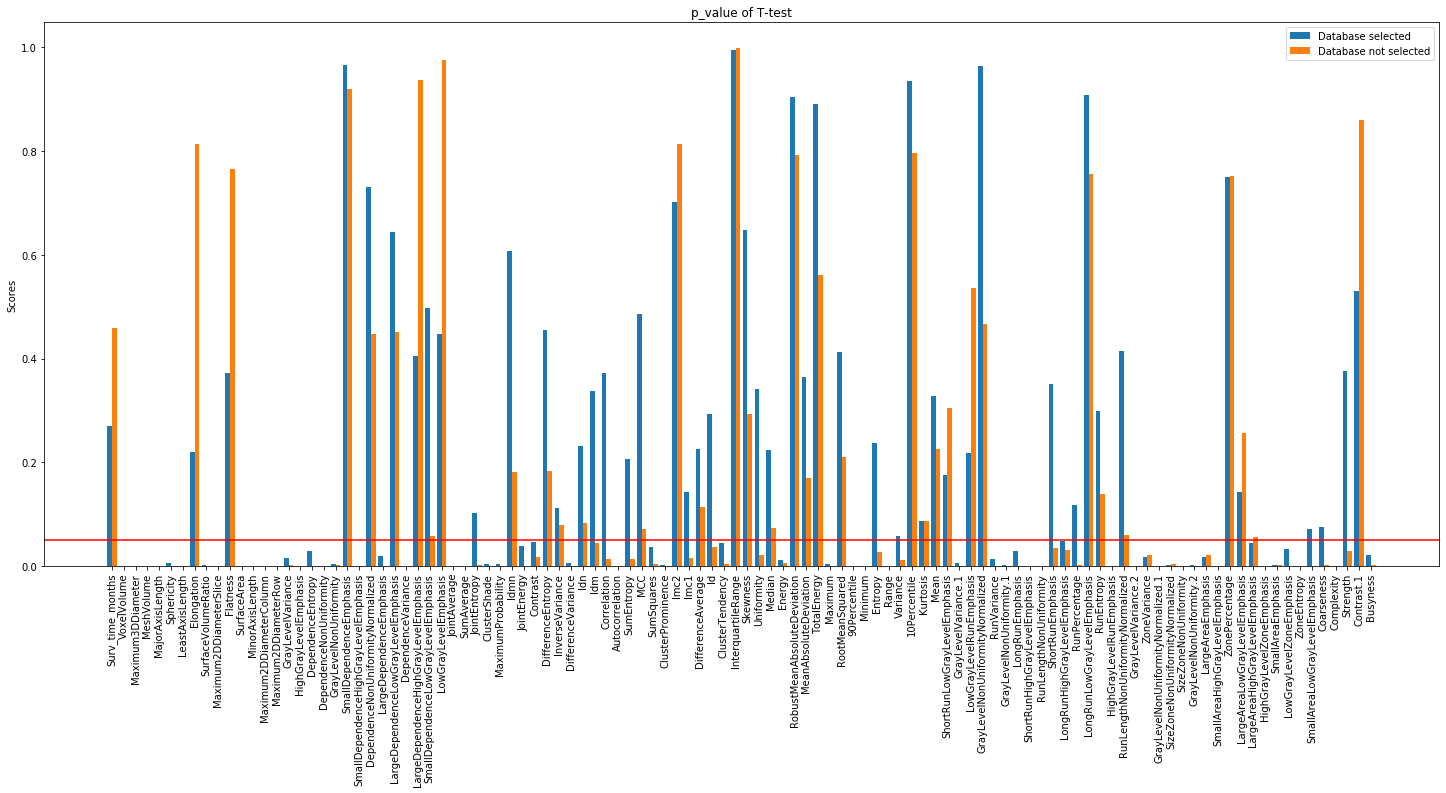

In [42]:
x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(25, 10))
rects1 = ax.bar(x - width/2, t_test_list_selected, width, label='Database selected')
rects2 = ax.bar(x + width/2, t_test_list, width, label='Database not selected')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('p_value of T-test')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

plt.axhline(y=0.05, color='r')

#Welch’s t-test

Non assume che le due popolazioni abbiano uguale varianza

In [0]:
from scipy.stats import ttest_ind

##Welch’s t-test su dati selected

In [0]:
Wt_test_list_selected=[]
for column in train_data_bis_selected.columns:
   stat, p_value = scipy.stats.ttest_ind(train_data_bis_selected[column], test_data_bis[column], equal_var=False)
   Wt_test_list_selected.append(p_value)

In [45]:
max(Wt_test_list_selected)

0.9959050726991392

In [46]:
len(Wt_test_list_selected)

108

p-value alto   ---->   si accetta l'Hp zero   ---->   la differenza osservata è STATISTICAMENTE NON SIGNIFICATIVA

p-value basso ----> si rigetta l'Hp zero ----> la differenza osservata è STATISTICAMENTE SIGNIFICATIVA

Per aclune features si ha p-value alto, per altre p-value basso

##Welch’s t-test su dati non selected

In [0]:
Wt_test_list=[]
for column in train_data_bis.columns:
   stat, p_value = scipy.stats.ttest_ind(train_data_bis[column], test_data_bis[column], equal_var=False)
   Wt_test_list.append(p_value)

In [48]:
max(Wt_test_list)

0.9984909256516104

##Plot Welch’s t-test results

In [0]:
labels = train_data_bis_selected.columns

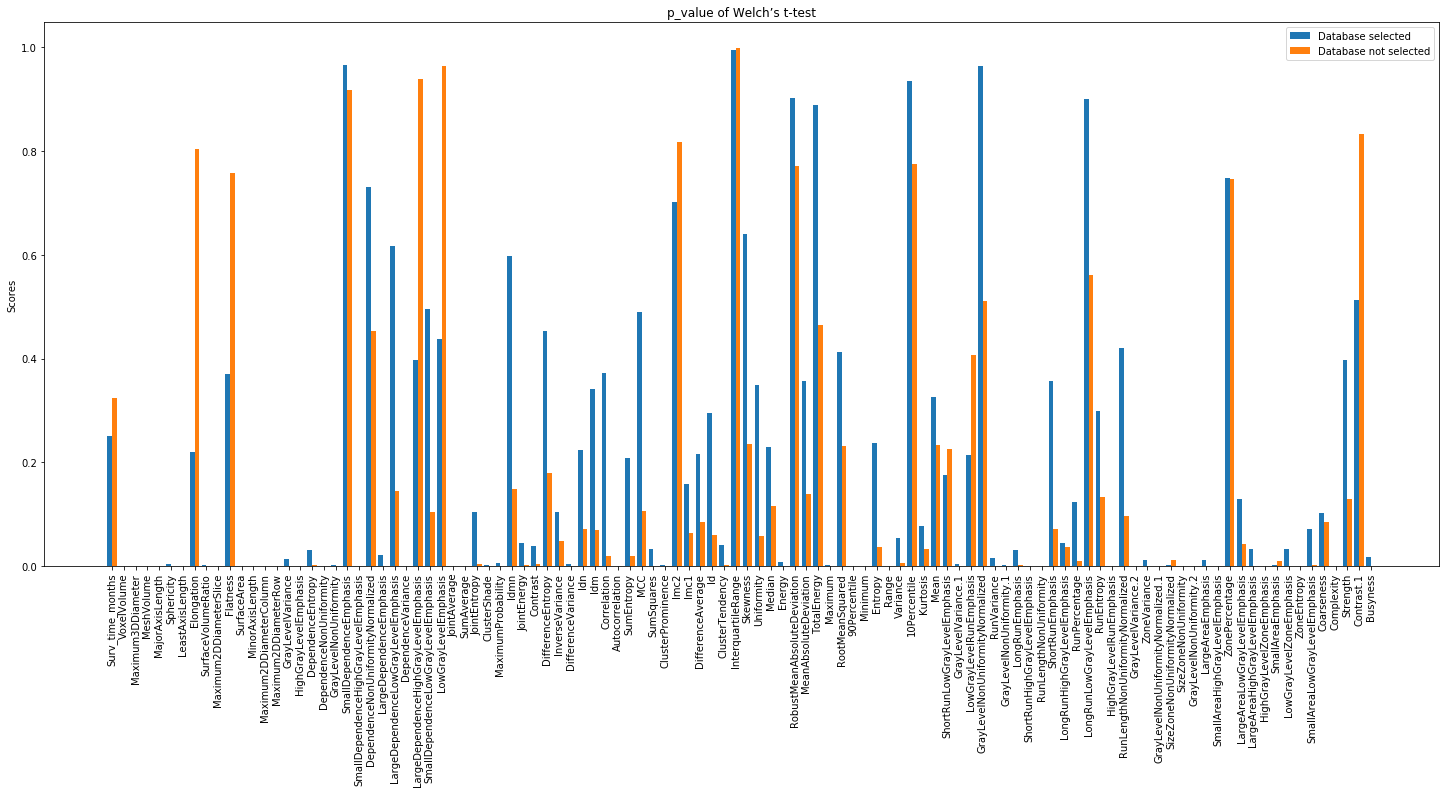

In [50]:
x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(25, 10))
rects1 = ax.bar(x - width/2, Wt_test_list_selected, width, label='Database selected')
rects2 = ax.bar(x + width/2, Wt_test_list, width, label='Database not selected')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('p_value of Welch’s t-test')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

#Test di Mann-Whitney

The Mann-Whitney U test for comparing independent data samples: the nonparametric version of the Student t-test.

Nonparametric statistics are those methods that do not assume a specific distribution to the data.

A common question about two or more datasets is whether they are different. Specifically, whether the difference between their central tendency (e.g. mean or median) is statistically significant.

This question can be answered for data samples that do not have a Gaussian distribution by using nonparametric statistical significance tests. The null hypothesis of these tests is often the assumption that both samples were drawn from a population with the same distribution, and therefore the same population parameters, such as mean or median.

If after calculating the significance test on two or more samples the null hypothesis is rejected, it indicates that there is evidence to suggest that samples were drawn from different populations, and in turn the difference between sample estimates of population parameters, such as means or medians may be significant.

In general, each test calculates a test statistic, that must be interpreted with some background in statistics and a deeper knowledge of the statistical test itself. Tests also return a p-value that can be used to interpret the result of the test. The p-value can be thought of as the probability of observing the two data samples given the base assumption (null hypothesis) that the two samples were drawn from a population with the same distribution.

The p-value can be interpreted in the context of a chosen significance level called alpha. A common value for alpha is 5% or 0.05. If the p-value is below the significance level, then the test says there is enough evidence to reject the null hypothesis and that the samples were likely drawn from populations with differing distributions.

    p <= alpha: reject H0, different distribution.
    p > alpha: fail to reject H0, same distribution.


The Mann-Whitney U test is a nonparametric statistical significance test for determining whether two independent samples were drawn from a population with the same distribution.

The default assumption or null hypothesis is that there is no difference between the distributions of the data samples. Rejection of this hypothesis suggests that there is likely some difference between the samples


    Fail to Reject H0: Sample distributions are equal.
    Reject H0: Sample distributions are not equal.


For the test to be effective, it requires at least 20 observations in each data sample.

We can implement the Mann-Whitney U test in Python using the mannwhitneyu() SciPy function. The functions takes as arguments the two data samples. It returns the test statistic and the p-value.

In [0]:
from scipy.stats import mannwhitneyu

##Mann-Whitney U test su dati selected

In [0]:
U_test_list_selected=[]
for column in train_data_bis_selected.columns:
   stat, p_value = mannwhitneyu(train_data_bis_selected[column], test_data_bis[column])
   U_test_list_selected.append(p_value)

In [53]:
U_test_list_selected

[0.34200700474328816,
 0.00012576283967360335,
 0.0003641579335788286,
 0.00012576283967360335,
 0.001052550742137339,
 0.00499682144788179,
 6.876941862989596e-05,
 0.11325704228993894,
 0.0006499676654329697,
 0.0001311804129585489,
 0.2593443314814973,
 9.32525846182116e-05,
 9.735585154739855e-05,
 0.00035005200899942697,
 0.0002541327980309525,
 0.004842244955847175,
 1.4384601595326164e-09,
 0.014423379994577414,
 2.794979880349844e-05,
 0.006598091216541554,
 0.38274497057654566,
 7.252913887060762e-09,
 0.31082373910568234,
 0.009430365982676882,
 3.291711858438634e-06,
 0.00035005200899942697,
 0.2489151148829955,
 0.0038744268516483407,
 0.0013066251201307364,
 2.9572132486293127e-09,
 2.9572132486293127e-09,
 0.061097034786330724,
 0.0002646586305925493,
 0.0026112489108044874,
 0.041813315161632995,
 0.029926717395879272,
 0.056028434996407805,
 0.26642050054266697,
 0.027098556298066116,
 0.005319219040292192,
 0.030670794191755155,
 0.16048736063231767,
 0.182551391714620

##Mann-Whitney U test su dati non selected

In [0]:
U_test_list=[]
for column in train_data_bis.columns:
   stat, p_value = mannwhitneyu(train_data_bis[column], test_data_bis[column])
   U_test_list.append(p_value)

In [55]:
U_test_list

[0.43278952107616603,
 2.020390980159355e-08,
 6.0415063981388505e-09,
 2.0669370434351676e-08,
 2.114609720905024e-08,
 3.3240790212814856e-08,
 4.858398267587167e-08,
 0.39438567664110563,
 3.470348051372652e-05,
 4.766216429121833e-09,
 0.2641881555582283,
 2.88243429830484e-09,
 7.2947849585619135e-09,
 2.4790617323125907e-08,
 7.826386577868504e-09,
 0.0002634754100169338,
 3.306419283518061e-14,
 0.0004222964075246362,
 1.032285178330112e-09,
 0.0001748178095432652,
 0.4399582577589806,
 9.331467375385837e-13,
 0.13614329211382986,
 8.469843405318946e-05,
 8.764127049468218e-07,
 2.507170854372696e-07,
 0.46548823038995973,
 3.9057819032649e-05,
 0.0003544736590003005,
 8.502779449821494e-14,
 8.502779449821494e-14,
 0.001757077435627998,
 3.7256017481866226e-07,
 2.044743736706904e-06,
 0.011721843534979176,
 0.00040429506541971624,
 0.011477491370614398,
 0.12838258785284257,
 0.022093126866726882,
 0.00029250774272653653,
 0.013562148815773643,
 0.0287482710973786,
 0.00743911

##Plot Mann-Whitney U test results

In [0]:
labels = train_data_bis_selected.columns

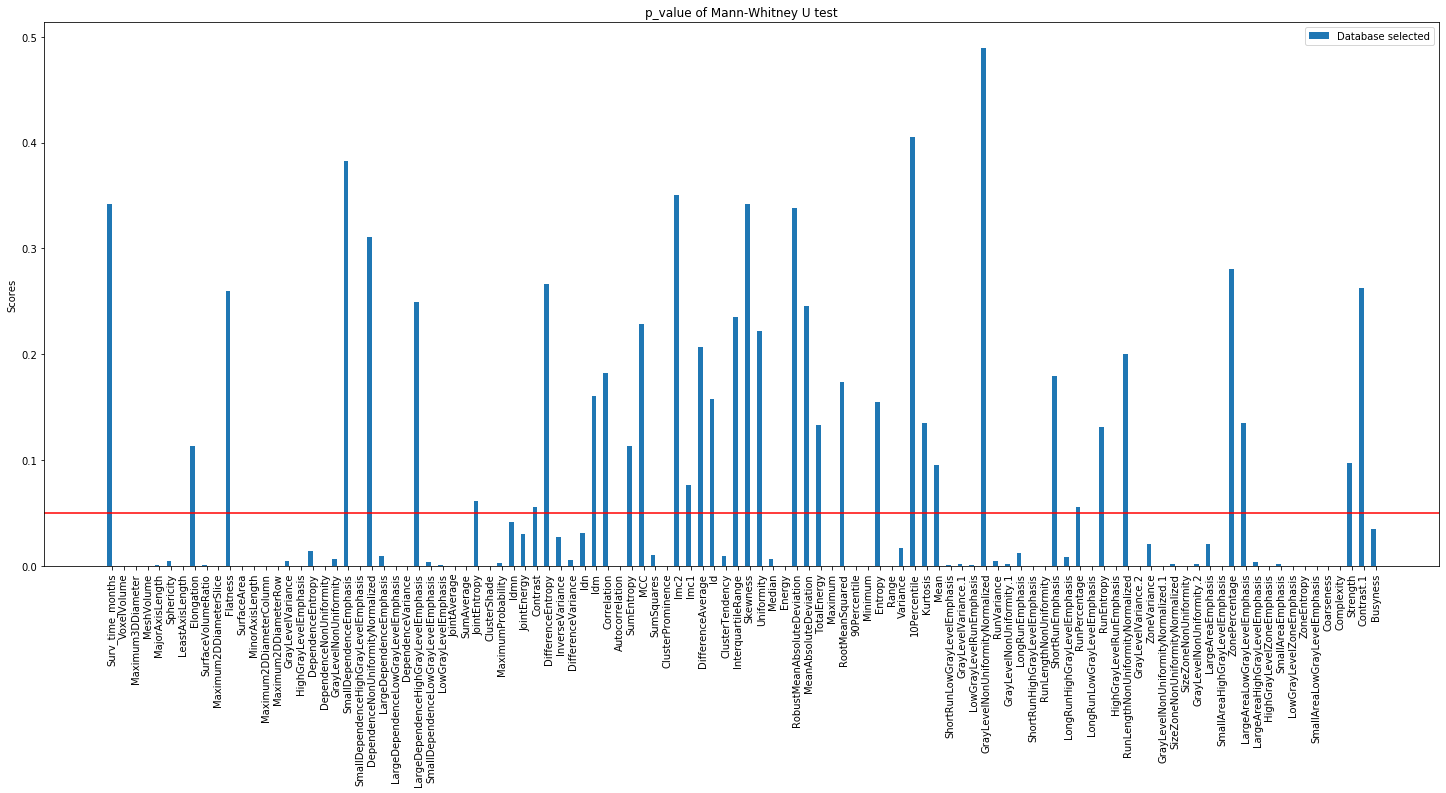

In [57]:
x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(25, 10))
rects1 = ax.bar(x - width/2, U_test_list_selected, width, label='Database selected')
#rects2 = ax.bar(x + width/2, U_test_list, width, label='Database not selected')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('p_value of Mann-Whitney U test')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

plt.axhline(y=0.05, color='r')

In [0]:
a=[i for i in U_test_list_selected if i>=0.05]

In [59]:
len(a)

37

In [60]:
len(U_test_list_selected)

108

###log scale + Bonferroni correction



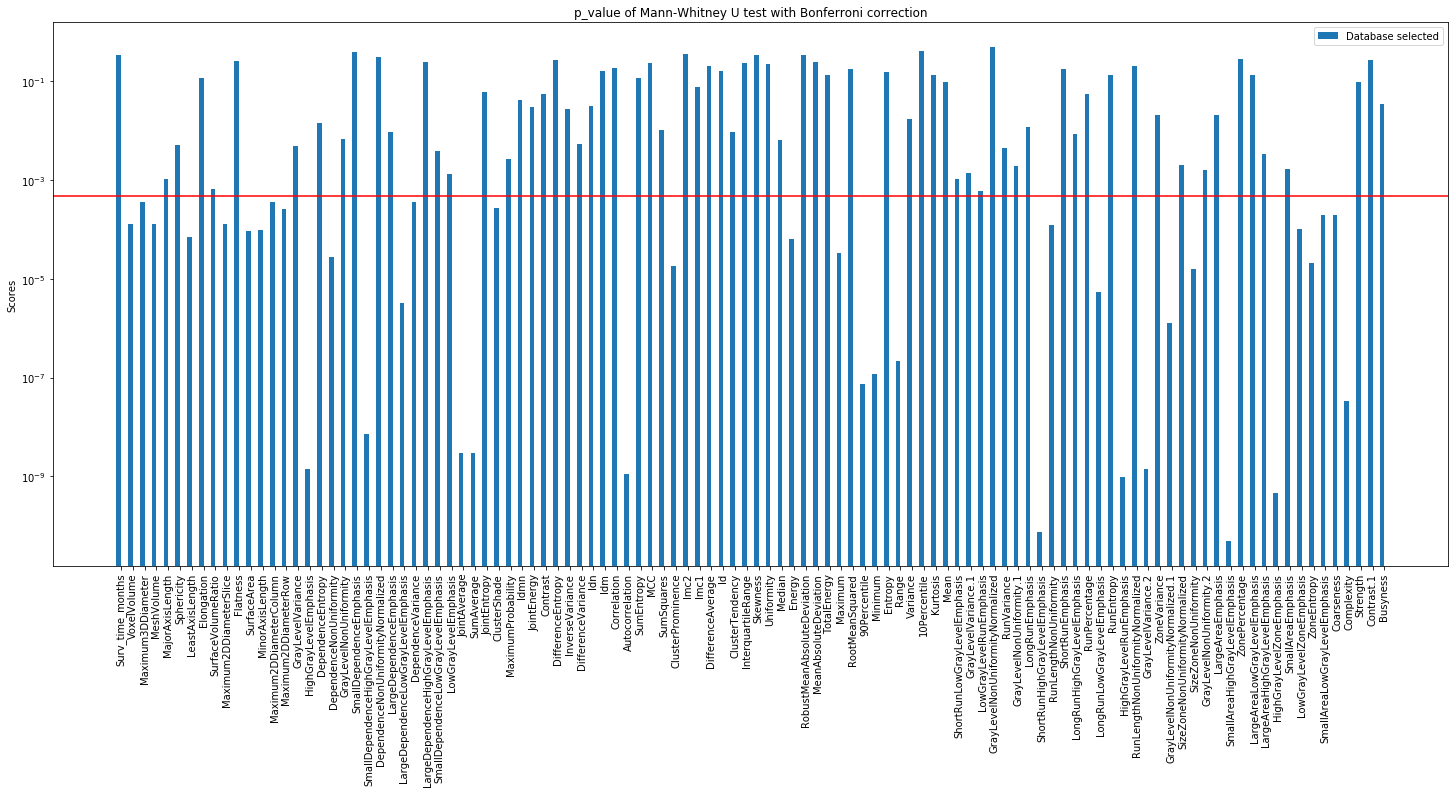

In [68]:
x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(25, 10))
rects1 = ax.bar(x - width/2, U_test_list_selected, width, label='Database selected')
#rects2 = ax.bar(x + width/2, U_test_list, width, label='Database not selected')

plt.yscale('log')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('p_value of Mann-Whitney U test with Bonferroni correction')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

plt.axhline(y=0.05/108, color='r')

In [0]:
b=[i for i in U_test_list_selected if i>=0.005/108]

In [66]:
len(b)

86